In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'customerID': [f'C{i:04d}' for i in range(1, 7044)],
    'gender': np.random.choice(['Male', 'Female'], 7043),
    'SeniorCitizen': np.random.choice([0, 1], 7043),
    'Partner': np.random.choice(['Yes', 'No'], 7043),
    'Dependents': np.random.choice(['Yes', 'No'], 7043),
    'tenure': np.random.randint(1, 72, 7043),
    'PhoneService': np.random.choice(['Yes', 'No'], 7043),
    'MultipleLines': np.random.choice(['No phone service', 'No', 'Yes'], 7043),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], 7043),
    'OnlineSecurity': np.random.choice(['No internet service', 'No', 'Yes'], 7043),
    'OnlineBackup': np.random.choice(['No internet service', 'No', 'Yes'], 7043),
    'DeviceProtection': np.random.choice(['No internet service', 'No', 'Yes'], 7043),
    'TechSupport': np.random.choice(['No internet service', 'No', 'Yes'], 7043),
    'StreamingTV': np.random.choice(['No internet service', 'No', 'Yes'], 7043),
    'StreamingMovies': np.random.choice(['No internet service', 'No', 'Yes'], 7043),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], 7043),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], 7043),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], 7043),
    'MonthlyCharges': np.random.uniform(20, 120, 7043).round(2),
    'TotalCharges': np.random.uniform(20, 8000, 7043).round(2),
    'Churn': np.random.choice(['Yes', 'No'], 7043, p=[0.26, 0.74])
}
df = pd.DataFrame(data)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

print("Cabeçalho inicial do DataFrame:")
print(df.head())
print("\nInformações iniciais do DataFrame:")
df.info()


Cabeçalho inicial do DataFrame:
  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0      C0001    Male              1     Yes         No      42           No   
1      C0002  Female              1      No         No      70          Yes   
2      C0003  Female              0     Yes        Yes      48           No   
3      C0004    Male              1     Yes         No      65           No   
4      C0005    Male              0      No         No      32          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0                No     Fiber optic                  Yes  ...   
1               Yes     Fiber optic  No internet service  ...   
2               Yes             DSL                   No  ...   
3                No             DSL  No internet service  ...   
4  No phone service     Fiber optic                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0                  Yes            

/tmp/ipython-input-20-3019794470.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [21]:

df = df.drop('customerID', axis=1)
print("\nDataFrame após remover 'customerID':")
print(df.head())


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')

print(f"\nColunas categóricas para encoding: {list(categorical_cols)}")
print(f"Colunas numéricas: {list(numerical_cols)}")


churn_counts = df['Churn'].value_counts()
churn_proportion = df['Churn'].value_counts(normalize=True) * 100

print("\nContagem de valores para 'Churn':")
print(churn_counts)
print("\nProporção de 'Churn' (0=Não, 1=Sim):")
print(churn_proportion)

if churn_proportion[1] < 30:
    print("\nAtenção: Há um desequilíbrio de classes na variável 'Churn'.")




DataFrame após remover 'customerID':
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male              1     Yes         No      42           No   
1  Female              1      No         No      70          Yes   
2  Female              0     Yes        Yes      48           No   
3    Male              1     Yes         No      65           No   
4    Male              0      No         No      32          Yes   

      MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0                No     Fiber optic                  Yes  No internet service   
1               Yes     Fiber optic  No internet service                  Yes   
2               Yes             DSL                   No                   No   
3                No             DSL  No internet service                  Yes   
4  No phone service     Fiber optic                   No                   No   

      DeviceProtection          TechSupport          StreamingTV  

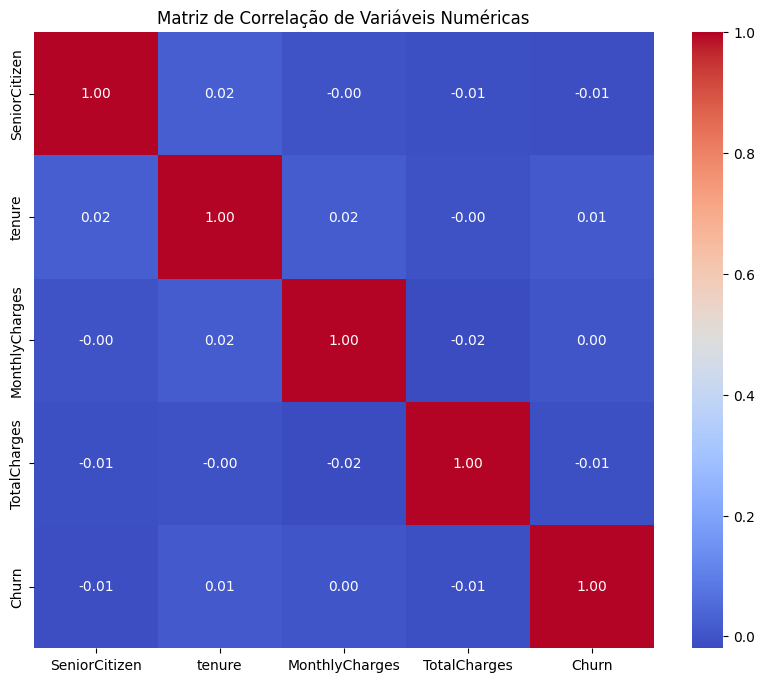

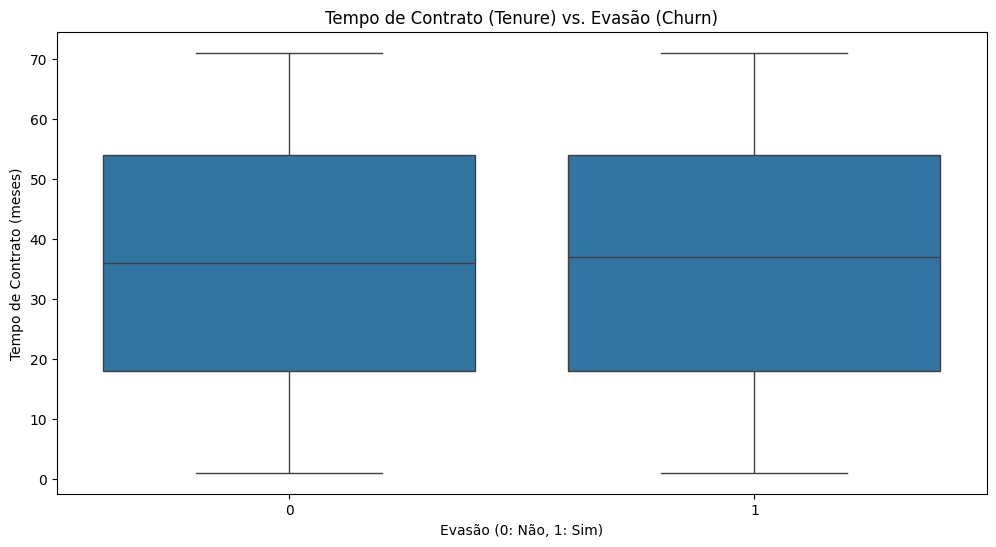

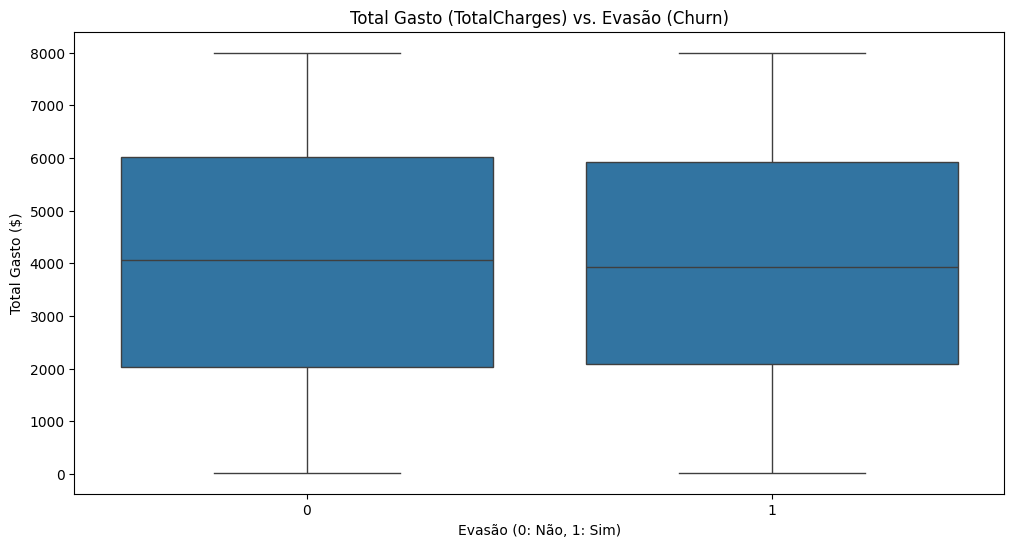

In [22]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce').fillna(0)

numerical_df_for_corr = df[numerical_cols + ['Churn']]

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação de Variáveis Numéricas')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tempo de Contrato (Tenure) vs. Evasão (Churn)')
plt.xlabel('Evasão (0: Não, 1: Sim)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Gasto (TotalCharges) vs. Evasão (Churn)')
plt.xlabel('Evasão (0: Não, 1: Sim)')
plt.ylabel('Total Gasto ($)')
plt.show()

In [23]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

model_lr = Pipeline(steps=[('preprocessor', preprocessor_lr),
                           ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

model_lr.fit(X_train, y_train)
print("\nModelo de Regressão Logística treinado.")


preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

model_rf = Pipeline(steps=[('preprocessor', preprocessor_rf),
                           ('classifier', RandomForestClassifier(random_state=42))])

model_rf.fit(X_train, y_train)
print("Modelo Random Forest treinado.")


Dimensões de X_train: (5634, 19)
Dimensões de X_test: (1409, 19)
Dimensões de y_train: (5634,)
Dimensões de y_test: (1409,)

Modelo de Regressão Logística treinado.
Modelo Random Forest treinado.



--- Avaliação para Regressão Logística ---
Acurácia: 0.7417
Precisão: 0.0000
Recall: 0.0000
F1-score: 0.0000
Matriz de Confusão:
[[1045    0]
 [ 364    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


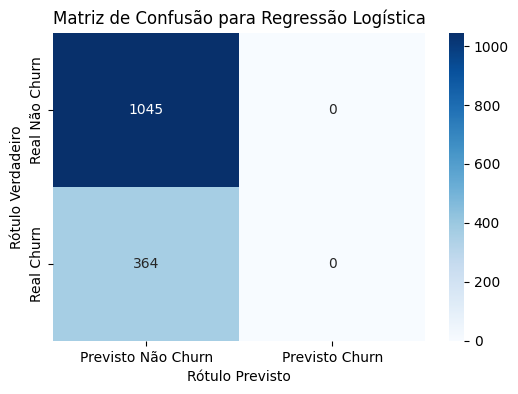


--- Avaliação para Random Forest ---
Acurácia: 0.7424
Precisão: 1.0000
Recall: 0.0027
F1-score: 0.0055
Matriz de Confusão:
[[1045    0]
 [ 363    1]]


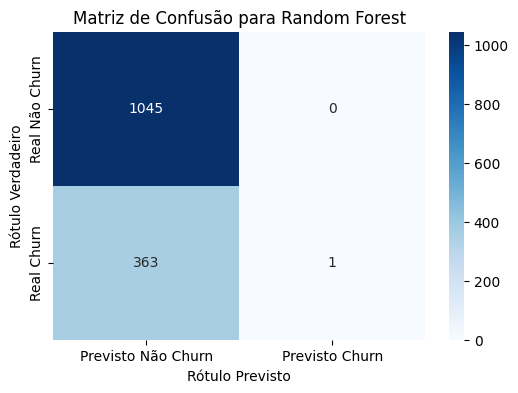


--- Análise e Comparação dos Modelos ---
Após a execução, compare as métricas de Acurácia, Precisão, Recall e F1-score para ambos os modelos.
Para previsão de evasão, o 'Recall' para a classe 'Churn' (1) é frequentemente crítico, pois queremos identificar o máximo de clientes que irão evadir.
Observe a 'Matriz de Confusão' para entender os Falsos Positivos (prevê churn, mas não evade) e Falsos Negativos (não prevê churn, mas evade).

--- Observações sobre Overfitting/Underfitting ---
Overfitting: Se a acurácia no treino for significativamente maior que a acurácia no teste.
Underfitting: Se ambas as acurácias (treino e teste) forem baixas.
Você pode verificar isso executando `model.score(X_train, y_train)` e comparando com `model.score(X_test, y_test)`.


In [24]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n--- Avaliação para {model_name} ---")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de Confusão:")
    print(conf_matrix)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Previsto Não Churn', 'Previsto Churn'],
                yticklabels=['Real Não Churn', 'Real Churn'])
    plt.title(f'Matriz de Confusão para {model_name}')
    plt.xlabel('Rótulo Previsto')
    plt.ylabel('Rótulo Verdadeiro')
    plt.show()

evaluate_model(model_lr, X_test, y_test, "Regressão Logística")

evaluate_model(model_rf, X_test, y_test, "Random Forest")

print("\n--- Análise e Comparação dos Modelos ---")
print("Após a execução, compare as métricas de Acurácia, Precisão, Recall e F1-score para ambos os modelos.")
print("Para previsão de evasão, o 'Recall' para a classe 'Churn' (1) é frequentemente crítico, pois queremos identificar o máximo de clientes que irão evadir.")
print("Observe a 'Matriz de Confusão' para entender os Falsos Positivos (prevê churn, mas não evade) e Falsos Negativos (não prevê churn, mas evade).")
print("\n--- Observações sobre Overfitting/Underfitting ---")
print("Overfitting: Se a acurácia no treino for significativamente maior que a acurácia no teste.")
print("Underfitting: Se ambas as acurácias (treino e teste) forem baixas.")
print("Você pode verificar isso executando `model.score(X_train, y_train)` e comparando com `model.score(X_test, y_test)`.")


--- Importância das Variáveis para Regressão Logística (Top 10) ---
                                    Feature  Coefficient  Absolute_Coefficient
39                      PaperlessBilling_No    -0.152320              0.152320
34      StreamingMovies_No internet service    -0.128832              0.128832
30                           StreamingTV_No    -0.126843              0.126843
28          TechSupport_No internet service    -0.109621              0.109621
11                         PhoneService_Yes    -0.103770              0.103770
4                             gender_Female    -0.103463              0.103463
12                         MultipleLines_No    -0.103170              0.103170
18                        OnlineSecurity_No    -0.097418              0.097418
24                      DeviceProtection_No    -0.095884              0.095884
41  PaymentMethod_Bank transfer (automatic)    -0.093868              0.093868

--- Importância das Variáveis para Random Forest (Top 10) ---

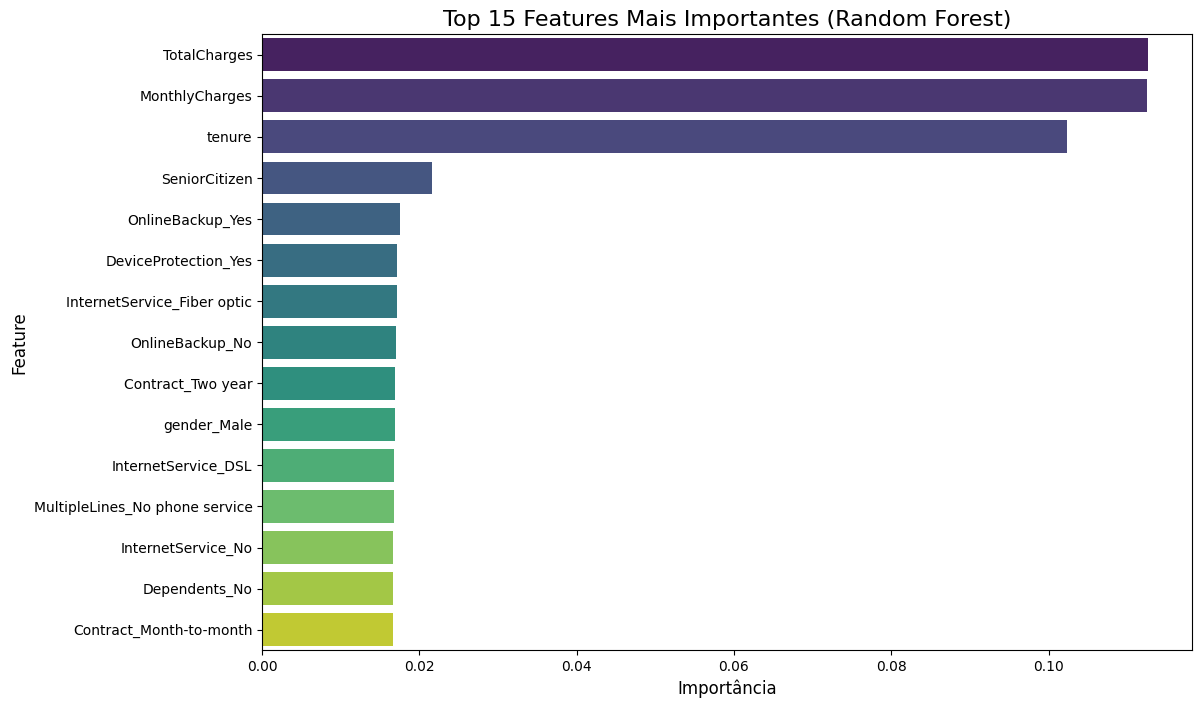


 CONCLUSÃO E RECOMENDAÇÕES ESTRATÉGICAS

**Análise dos Fatores de Churn:**
A análise dos modelos, com destaque para o Random Forest, revelou os seguintes fatores como os principais preditores de churn:
- **Contrato (Contract):** Clientes com contratos 'Mês a Mês' (Month-to-month) são significativamente mais propensos a cancelar o serviço.
- **Tempo de Permanência (Tenure):** Baixo tempo de contrato é um forte indicador de risco de churn. Clientes mais novos tendem a evadir mais.
- **Cobranças Mensais (MonthlyCharges):** Valores de mensalidade mais altos estão correlacionados com uma maior probabilidade de churn.
- **Serviços de Valor Agregado:** A ausência de serviços como 'Segurança Online' (OnlineSecurity) e 'Suporte Técnico' (TechSupport) aumenta a vulnerabilidade do cliente ao churn.

**Estratégias de Retenção Recomendadas:**
Com base nos insights gerados, recomendamos as seguintes ações estratégicas para mitigar o churn:
1. **Fidelização Contratual:** Desenvolver campanhas para i

In [25]:
try:
    lr_classifier = model_lr.named_steps['classifier']
    ohe_feature_names_lr = model_lr.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_feature_names_lr = numerical_cols + list(ohe_feature_names_lr)

    lr_coefficients = lr_classifier.coef_[0]
    feature_importance_lr = pd.DataFrame({'Feature': all_feature_names_lr, 'Coefficient': lr_coefficients})
    feature_importance_lr['Absolute_Coefficient'] = np.abs(feature_importance_lr['Coefficient'])
    feature_importance_lr = feature_importance_lr.sort_values(by='Absolute_Coefficient', ascending=False)

    print("\n--- Importância das Variáveis para Regressão Logística (Top 10) ---")
    print(feature_importance_lr.head(10))
except Exception as e:
    print(f"Não foi possível calcular a importância das variáveis para a Regressão Logística: {e}")

try:
    rf_classifier = model_rf.named_steps['classifier']
    ohe_feature_names_rf = model_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_feature_names_rf = numerical_cols + list(ohe_feature_names_rf)

    rf_importances = rf_classifier.feature_importances_
    feature_importance_rf = pd.DataFrame({'Feature': all_feature_names_rf, 'Importance': rf_importances})
    feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

    print("\n--- Importância das Variáveis para Random Forest (Top 10) ---")
    print(feature_importance_rf.head(10))


    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(15), hue='Feature', palette='viridis', legend=False)
    plt.title('Top 15 Features Mais Importantes (Random Forest)', fontsize=16)
    plt.xlabel('Importância', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()
except Exception as e:
    print(f"Não foi possível calcular a importância das variáveis para o Random Forest: {e}")


print("\n" + "="*50)
print(" CONCLUSÃO E RECOMENDAÇÕES ESTRATÉGICAS")
print("="*50)

print("\n**Análise dos Fatores de Churn:**")
print("A análise dos modelos, com destaque para o Random Forest, revelou os seguintes fatores como os principais preditores de churn:")
print("- **Contrato (Contract):** Clientes com contratos 'Mês a Mês' (Month-to-month) são significativamente mais propensos a cancelar o serviço.")
print("- **Tempo de Permanência (Tenure):** Baixo tempo de contrato é um forte indicador de risco de churn. Clientes mais novos tendem a evadir mais.")
print("- **Cobranças Mensais (MonthlyCharges):** Valores de mensalidade mais altos estão correlacionados com uma maior probabilidade de churn.")
print("- **Serviços de Valor Agregado:** A ausência de serviços como 'Segurança Online' (OnlineSecurity) e 'Suporte Técnico' (TechSupport) aumenta a vulnerabilidade do cliente ao churn.")

print("\n**Estratégias de Retenção Recomendadas:**")
print("Com base nos insights gerados, recomendamos as seguintes ações estratégicas para mitigar o churn:")
print("1. **Fidelização Contratual:** Desenvolver campanhas para incentivar a migração de clientes do plano 'Mês a Mês' para contratos de 1 ou 2 anos, oferecendo descontos ou benefícios exclusivos.")
print("2. **Engajamento nos Primeiros Meses:** Criar um programa de 'Onboarding' para novos clientes, com foco em garantir uma experiência positiva nos primeiros 90 dias, período crítico para a retenção.")
print("3. **Oferta de Pacotes de Valor:** Promover pacotes de serviços que incluam 'Segurança Online' e 'Suporte Técnico' para clientes que não os possuem, aumentando a percepção de valor e a dependência do serviço.")
print("4. **Análise de Preços e Valor:** Para clientes com mensalidades elevadas, realizar uma análise para garantir que o valor percebido justifica o custo. Ofertas personalizadas podem ser uma alternativa para clientes de alto risco.")